In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns 
import plotly.express as px
from sklearn.decomposition import PCA
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.cm as cm
from pathlib import Path


# Use the parent directory of this file for results
# results_dir = os.getcwd()
results_dir = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250919"
data_dir = os.path.join(results_dir, "data")
plot_dir = os.path.join(results_dir, "plots")

print(f"Results directory: {results_dir}")
os.makedirs(plot_dir, exist_ok=True)
os.makedirs(data_dir, exist_ok=True)


morphseq_root = os.environ.get('MORPHSEQ_REPO_ROOT')
morphseq_root = "/net/trapnell/vol1/home/mdcolon/proj/morphseq"
print(f"MORPHSEQ_REPO_ROOT: {morphseq_root}")
os.chdir(morphseq_root)

from src.functions.embryo_df_performance_metrics import *
from src.functions.spline_morph_spline_metrics import *

embryo_stats_df_file = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250917/data/embryo_stats_df.csv"

embryo_stats_df = pd.read_csv(embryo_stats_df_file)


/net/trapnell/vol1/home/mdcolon/software/miniconda3/envs/vae_env_cluster/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Results directory: /net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250919
MORPHSEQ_REPO_ROOT: /net/trapnell/vol1/home/mdcolon/proj/morphseq


/tmp/22952982.1.trapnell-short.q/ipykernel_1644185/3768395356.py:34: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  embryo_stats_df = pd.read_csv(embryo_stats_df_file)


In [ ]:
# Configuration - change these column names as needed
primary_grouping_col = 'experiment_date'
secondary_grouping_col = 'phenotype'

# Breakdown by experiment
print("=" * 60)
print(f"{secondary_grouping_col.upper()} BREAKDOWN BY {primary_grouping_col.upper()}")
print("=" * 60)

combined_df = embryo_stats_df[[primary_grouping_col, secondary_grouping_col]].copy()
combined_df[primary_grouping_col] = combined_df[primary_grouping_col].astype(str)


for exp in sorted(combined_df[primary_grouping_col].unique()):
    exp_df = combined_df[combined_df[primary_grouping_col] == exp]
    print(f"\n{primary_grouping_col.title()} {exp} (Total: {len(exp_df)} rows):")
    print("-" * 40)
    category_counts = exp_df[secondary_grouping_col].value_counts()
    for category, count in category_counts.items():
        percentage = (count / len(exp_df)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")

# Summary table
print("\n" + "=" * 60)
print("SUMMARY TABLE")
print("=" * 60)
summary_table = combined_df.groupby([primary_grouping_col, secondary_grouping_col]).size().unstack(fill_value=0)
print(summary_table)

# Add totals
summary_table.loc['TOTAL'] = summary_table.sum()
summary_table['TOTAL'] = summary_table.sum(axis=1)

print("\nWith totals:")
print(summary_table)

PHENOTYPE BREAKDOWN BY EXPERIMENT_DATE

Experiment_Date 20230525 (Total: 2906 rows):
----------------------------------------
  wt: 2906 (100.0%)

Experiment_Date 20230531 (Total: 3932 rows):
----------------------------------------
  wt: 3932 (100.0%)

Experiment_Date 20230602 (Total: 3638 rows):
----------------------------------------
  wt: 3638 (100.0%)

Experiment_Date 20230608 (Total: 1998 rows):
----------------------------------------
  wt: 1998 (100.0%)

Experiment_Date 20230613 (Total: 3587 rows):
----------------------------------------
  gdf3: 2526 (70.4%)
  wt: 1061 (29.6%)

Experiment_Date 20230615 (Total: 3167 rows):
----------------------------------------
  wt: 3167 (100.0%)

Experiment_Date 20230620 (Total: 3160 rows):
----------------------------------------
  shh-i: 2377 (75.2%)
  ethanol: 698 (22.1%)
  wt: 85 (2.7%)

Experiment_Date 20230622 (Total: 1997 rows):
----------------------------------------
  fgf-i: 1352 (67.7%)
  wt: 645 (32.3%)

Experiment_Date 2023062

In [12]:
# Configuration - change these column names as needed
primary_grouping_col = 'experiment_date'
secondary_grouping_col = 'short_pert_name'

# Breakdown by experiment
print("=" * 60)
print(f"{secondary_grouping_col.upper()} BREAKDOWN BY {primary_grouping_col.upper()}")
print("=" * 60)

combined_df = embryo_stats_df[[primary_grouping_col, secondary_grouping_col]].copy()
combined_df[primary_grouping_col] = combined_df[primary_grouping_col].astype(str)

for exp in sorted(combined_df[primary_grouping_col].unique()):
    exp_df = combined_df[combined_df[primary_grouping_col] == exp]
    print(f"\n{primary_grouping_col.title()} {exp} (Total: {len(exp_df)} rows):")
    print("-" * 40)
    category_counts = exp_df[secondary_grouping_col].value_counts()
    for category, count in category_counts.items():
        percentage = (count / len(exp_df)) * 100
        print(f"  {category}: {count} ({percentage:.1f}%)")

# Summary table
print("\n" + "=" * 60)
print("SUMMARY TABLE")
print("=" * 60)
summary_table = combined_df.groupby([primary_grouping_col, secondary_grouping_col]).size().unstack(fill_value=0)
print(summary_table)

# Add totals
summary_table.loc['TOTAL'] = summary_table.sum()
summary_table['TOTAL'] = summary_table.sum(axis=1)

print("\nWith totals:")
print(summary_table)

SHORT_PERT_NAME BREAKDOWN BY EXPERIMENT_DATE

Experiment_Date 20230525 (Total: 2906 rows):
----------------------------------------
  wt_wik: 2906 (100.0%)

Experiment_Date 20230531 (Total: 3932 rows):
----------------------------------------
  wt_wik: 3932 (100.0%)

Experiment_Date 20230602 (Total: 3638 rows):
----------------------------------------
  wt_wik: 3638 (100.0%)

Experiment_Date 20230608 (Total: 1998 rows):
----------------------------------------
  wt_wik: 1998 (100.0%)

Experiment_Date 20230613 (Total: 3587 rows):
----------------------------------------
  gdf3_gdf3: 2526 (70.4%)
  wt_wik: 1061 (29.6%)

Experiment_Date 20230615 (Total: 3167 rows):
----------------------------------------
  wt_wik: 3167 (100.0%)

Experiment_Date 20230620 (Total: 3160 rows):
----------------------------------------
  shh-i_100_06: 905 (28.6%)
  ethanol_100_06: 698 (22.1%)
  shh-i_025_06: 648 (20.5%)
  shh-i_075_06: 466 (14.7%)
  shh-i_050_06: 358 (11.3%)
  wt_H2B-mScarlet: 85 (2.7%)

Exper

In [ ]:
# Subset to 5k random rows where master_perturbation = 'wt' and rename column
# First, let's see what values are available in master_perturbation

# embryo_stats_df_file = "/net/trapnell/vol1/home/mdcolon/proj/morphseq/results/mcolon/20250917/data/embryo_stats_df.csv"

# embryo_stats_df = pd.read_csv(embryo_stats_df_file)

# Filter to wt (wild-type) rows
wt_rows = embryo_stats_df[embryo_stats_df['short_pert_name'] == 'wt_wik'].copy()
print(f"\nTotal wt rows available: {len(wt_rows)}")

wt_rows.loc[wt_rows['short_pert_name'] == "wt_wik", 'short_pert_name'] = "wik"


# # Sample 6k random rows (or all if less than 6k available)
# n_sample = min(6000, len(wt_rows))
# wt_subset = wt_rows.sample(n=n_sample, random_state=42)

# # Rename master_perturbation column to genotype
# wt_subset = wt_subset.rename(columns={'short_pert_name': 'genotype'})

# print(f"Created subset with {len(wt_subset)} rows")
# print(f"New column 'genotype' values: {wt_subset['genotype'].unique()}")

# # Show first few rows to verify
# print("\nFirst 5 rows of subset:")
# print(wt_subset[['experiment_date', 'genotype']].head())


Total wt rows available: 22867
Created subset with 6000 rows
New column 'genotype' values: ['wik']

First 5 rows of subset:
      experiment_date genotype
25262        20230627      wik
7217         20230602      wik
7495         20230602      wik
11203        20230608      wik
13754        20230613      wik


In [18]:
embryo_stats_df

,Unnamed: 0,snip_id,embryo_id,experiment_time,experiment_date,temperature,medium,short_pert_name,control_flag,phenotype,...,UMAP_01_n_2,UMAP_00_3,UMAP_01_3,UMAP_02_3,UMAP_00_bio_3,UMAP_01_bio_3,UMAP_02_bio_3,UMAP_00_n_3,UMAP_01_n_3,UMAP_02_n_3
0,0,20230525_A03_e00_t0001,20230525_A03_e00,594.316650,20230525,22.0,EM,wt_wik,0,wt,...,6.113778,11.795491,18.064615,7.241462,13.414267,2.959963,0.325531,15.143919,-1.534038,4.819255
1,1,20230525_A03_e00_t0002,20230525_A03_e00,3591.278076,20230525,22.0,EM,wt_wik,0,wt,...,6.109845,12.145292,17.216017,6.896110,12.316285,2.744224,0.565774,15.304776,-1.789300,4.680378
2,2,20230525_A03_e00_t0003,20230525_A03_e00,6591.527710,20230525,22.0,EM,wt_wik,0,wt,...,6.121473,12.467098,16.726833,6.890012,11.802103,2.249806,0.719600,15.478983,-1.996510,4.614255
3,3,20230525_A03_e00_t0004,20230525_A03_e00,9596.864624,20230525,22.0,EM,wt_wik,0,wt,...,5.896799,12.571184,16.426844,6.679163,10.924199,2.027630,0.590028,15.500874,-2.357604,4.292538
4,4,20230525_A03_e00_t0005,20230525_A03_e00,12591.573975,20230525,22.0,EM,wt_wik,0,wt,...,5.846201,12.631724,16.401478,6.631963,10.660670,1.807176,0.472977,15.503957,-2.437438,4.226534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107512,107512,20250305_H12_e00_t0330,20250305_H12_e00,162760.651623,20250305,30.0,MC1,wt_cep290,0,wt,...,-4.531865,1.190067,9.447335,8.339406,8.236109,5.657591,5.544200,10.945767,12.415935,8.924403
107513,107513,20250305_H12_e00_t0331,20250305_H12_e00,163252.568388,20250305,30.0,MC1,wt_cep290,0,wt,...,9.937831,15.801519,12.669538,-3.197492,7.408601,5.685382,5.339302,3.257926,7.556348,0.341117
107514,107514,20250305_H12_e00_t0332,20250305_H12_e00,163744.289463,20250305,30.0,MC1,wt_cep290,0,wt,...,9.937574,15.801490,12.669542,-3.197561,7.398356,5.683578,5.331314,3.257704,7.556888,0.340840
107515,107515,20250305_H12_e00_t0333,20250305_H12_e00,164233.901811,20250305,30.0,MC1,wt_cep290,0,wt,...,-4.545604,1.190692,9.446889,8.340215,8.235836,5.655251,5.535123,10.941903,12.420999,8.927093


In [18]:
wt_subset["predicted_stage_hpf"].describe()


count    6000.000000
mean       27.248039
std        10.309025
min        10.021641
25%        18.990288
50%        25.217057
75%        33.613056
max        62.688763
Name: predicted_stage_hpf, dtype: float64

In [20]:
embryo_stats_df["predicted_stage_hpf"].describe()

print( embryo_stats_df["experiment_date"].unique())

[20230525 20230531 20230602 20230608 20230613 20230615 20230620 20230622
 20230627 20230629 20230830 20230831 20231110 20231206 20231207 20231208
 20231218 20240306 20240307 20240314 20240404 20240411 20240418 20240509]


In [2]:
# Filter to wt (wild-type) rows
wt_rows = embryo_stats_df[embryo_stats_df['short_pert_name'] == 'wt_wik'].copy()
print(f"\nTotal wt rows available: {len(wt_rows)}")

wt_rows.loc[wt_rows['short_pert_name'] == "wt_wik", 'short_pert_name'] = "wik"

wt_rows


Total wt rows available: 22867


,Unnamed: 0,snip_id,embryo_id,experiment_time,experiment_date,temperature,medium,short_pert_name,control_flag,phenotype,...,UMAP_01_n_2,UMAP_00_3,UMAP_01_3,UMAP_02_3,UMAP_00_bio_3,UMAP_01_bio_3,UMAP_02_bio_3,UMAP_00_n_3,UMAP_01_n_3,UMAP_02_n_3
0,0,20230525_A03_e00_t0001,20230525_A03_e00,594.316650,20230525,22.0,EM,wik,0,wt,...,6.113778,11.795491,18.064615,7.241462,13.414267,2.959963,0.325531,15.143919,-1.534038,4.819255
1,1,20230525_A03_e00_t0002,20230525_A03_e00,3591.278076,20230525,22.0,EM,wik,0,wt,...,6.109845,12.145292,17.216017,6.896110,12.316285,2.744224,0.565774,15.304776,-1.789300,4.680378
2,2,20230525_A03_e00_t0003,20230525_A03_e00,6591.527710,20230525,22.0,EM,wik,0,wt,...,6.121473,12.467098,16.726833,6.890012,11.802103,2.249806,0.719600,15.478983,-1.996510,4.614255
3,3,20230525_A03_e00_t0004,20230525_A03_e00,9596.864624,20230525,22.0,EM,wik,0,wt,...,5.896799,12.571184,16.426844,6.679163,10.924199,2.027630,0.590028,15.500874,-2.357604,4.292538
4,4,20230525_A03_e00_t0005,20230525_A03_e00,12591.573975,20230525,22.0,EM,wik,0,wt,...,5.846201,12.631724,16.401478,6.631963,10.660670,1.807176,0.472977,15.503957,-2.437438,4.226534
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59648,59648,20240522_G01_e00_t0003,20240522_G01_e00,3351.328820,20240522,30.0,EM,wik,0,wt,...,5.356963,10.243702,18.401344,6.380901,13.324319,5.408668,0.537991,14.862138,-2.012880,4.298829
59649,59649,20240522_G01_e00_t0004,20240522_G01_e00,4427.456102,20240522,30.0,EM,wik,0,wt,...,5.390488,10.579207,18.332708,6.497259,13.454411,4.941978,0.100080,14.898820,-1.761277,4.241983
59650,59650,20240522_G01_e00_t0005,20240522_G01_e00,5501.859238,20240522,30.0,EM,wik,0,wt,...,5.968461,10.764428,18.006483,6.343410,12.757206,4.748272,-0.113106,14.924928,-1.758354,4.871825
59651,59651,20240522_G01_e00_t0006,20240522_G01_e00,6577.273385,20240522,30.0,EM,wik,0,wt,...,6.292670,10.871716,17.961990,6.235088,12.603976,4.707832,-0.209964,15.221406,-1.805683,5.026095


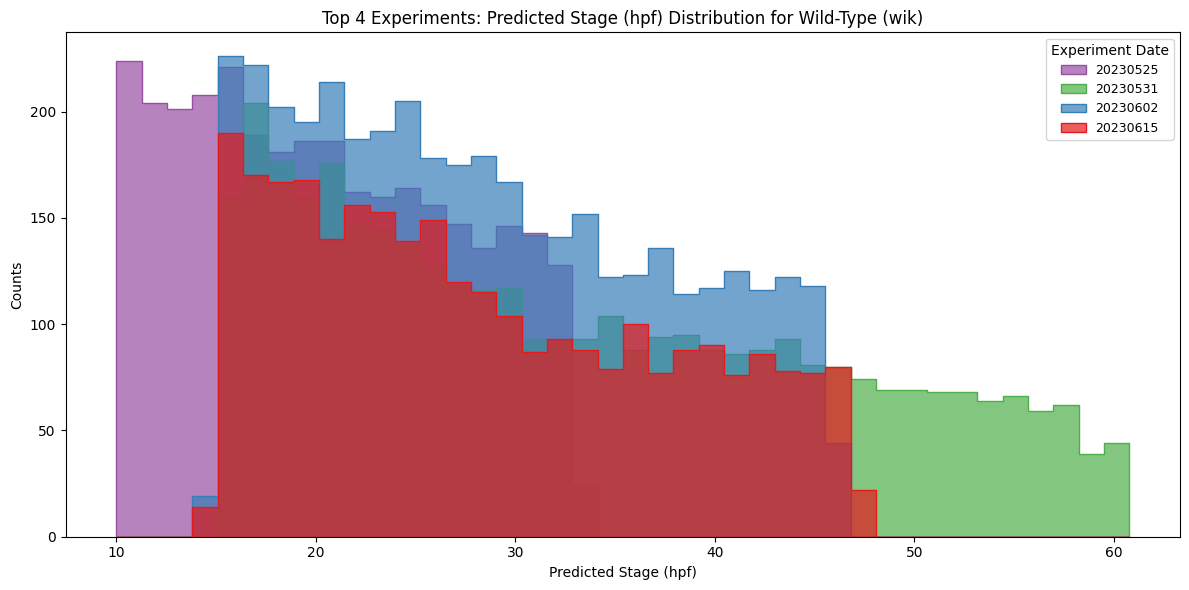

In [8]:
# Make sure the experiment_date column is clean
wt_top4 = wt_top4.dropna(subset=['experiment_date'])  # Remove any null dates
wt_top4["experiment_date"] = wt_top4["experiment_date"].astype(str)

# Sort the dates for consistent legend order
date_order = sorted(wt_top4["experiment_date"].unique())

plt.figure(figsize=(12, 6))
sns.histplot(
    data=wt_top4,
    x="predicted_stage_hpf",
    hue="experiment_date",
    hue_order=date_order,  # Explicitly set the order
    element="step",
    stat="count",
    common_norm=False,
    multiple="layer",
    alpha=0.7,
    palette="Set1"  # Try a different palette
)

plt.xlabel("Predicted Stage (hpf)")
plt.ylabel("Counts")
plt.title("Top 4 Experiments: Predicted Stage (hpf) Distribution for Wild-Type (wik)")

# Force the legend to show
plt.legend(title="Experiment Date", 
          labels=date_order,  # Explicitly set labels
          fontsize=9, 
          title_fontsize=10,
          loc='upper right')

plt.tight_layout()
plt.show()


Total wt rows available: 22867


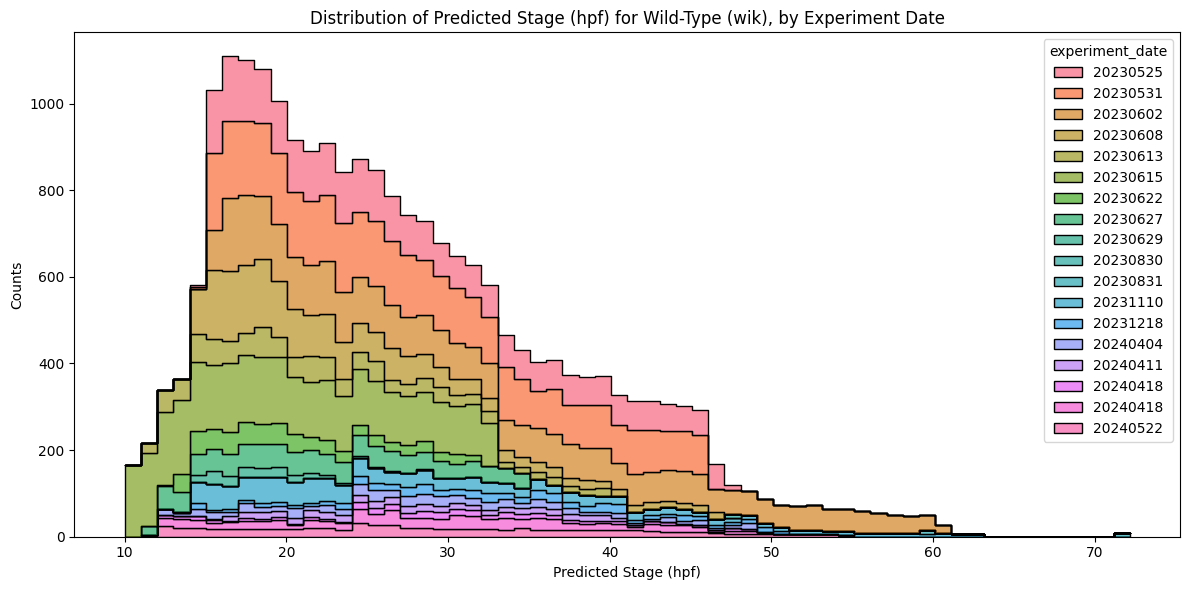

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Subset WT rows
wt_rows = embryo_stats_df[embryo_stats_df['short_pert_name'] == 'wt_wik'].copy()
wt_rows.loc[wt_rows['short_pert_name'] == "wt_wik", 'short_pert_name'] = "wik"

print(f"\nTotal wt rows available: {len(wt_rows)}")

# Plot histogram of predicted_stage_hpf, colored by experiment_date
plt.figure(figsize=(12, 6))
sns.histplot(
    data=wt_rows,
    x="predicted_stage_hpf",
    hue="experiment_date",
    element="step",      # bar-like steps, avoids overlap
    stat="count",        # raw counts
    common_norm=False,   # don't normalize across dates
    multiple="stack"     # stack bars so you see contribution by date
)

plt.xlabel("Predicted Stage (hpf)")
plt.ylabel("Counts")
plt.title("Distribution of Predicted Stage (hpf) for Wild-Type (wik), by Experiment Date")
plt.tight_layout()
plt.show()